In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]


In [ ]:
x=df.drop(["User ID","Purchased"],axis=1)
y=df["Purchased"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)  # You can change the number of neighbors
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.925


Confusion Matrix:
 [[74  5]
 [ 4 37]]


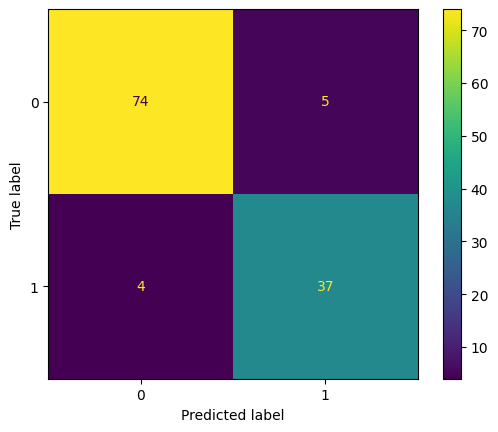

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
LABELS = [0,1]
# Optional: visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LABELS)
disp.plot()

## **KNN vs Decision Tree**

In [ ]:
Train = pd.read_csv("mnist_train.csv")

In [ ]:
Train.isnull().sum()

,0
label,0
1x1,0
1x2,0
1x3,0
1x4,0
...,...
28x24,1
28x25,1
28x26,1
28x27,1


In [ ]:
Train.fillna(Train.mean(numeric_only=True), inplace=True)

In [ ]:
x_train= Train.drop("label",axis=1)
y_train=Train["label"]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)  # You can change the number of neighbors
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
Test = pd.read_csv("mnist_test.csv")
Test.fillna(Test.mean(numeric_only=True), inplace=True)
x_test= Test.drop("label",axis=1)
y_test=Test["label"]

In [ ]:
x_test.isnull().sum()

,0
1x1,0
1x2,0
1x3,0
1x4,0
1x5,0
...,...
28x24,0
28x25,0
28x26,0
28x27,0


In [ ]:
Y_pred = knn.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8984432913269088


In [ ]:
Y_pred

array([7, 2, 1, ..., 3, 6, 4])

In [ ]:
#Decision Tree MNIST
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2 = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7353595255744997
